# Trabajo práctico 
## _Aprendizaje de Máquina I_
## CEIA Co13

### Alumno:
- Ferrán, Natanael Emir

### Dataset:
- [Water Quality](https://www.kaggle.com/datasets/adityakadiwal/water-potability/)
- **Licencia:** *Data files © Original Authors*
- **Autor:** *fedesoriano*

### A resolver:
- Clasificar distintas aguas en potables y no potables

### Técnicas utilizadas:
- Logistic Regression
- KNN
- Random forest
- Support Vector Machines
- NNet

***

## Importación de librerías esenciales y lectura del dataset

In [26]:
# importing needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# reading the file

url= 'https://raw.githubusercontent.com/nferran/tp_aprendizaje_de_maquina_I/main/water_potability.csv'
df= pd.read_csv(url)

## Análisis exploratorio inicial

In [28]:
# showing first 5 rows

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [29]:
df.shape

(3276, 10)

In [30]:
# showing a summary of numeric features

numeric_columns = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
df[numeric_columns].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


In [31]:
# showing features' types

df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [32]:
# checking target data balance

df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

<AxesSubplot:xlabel='Potability', ylabel='Count'>

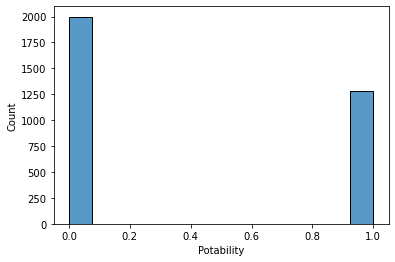

In [33]:
# plotting target data balance

sns.histplot(x= df.Potability) 

In [34]:
# checking distributions' skewness

print(f'ph distribution skewness: {df.ph.skew():.2f}')
print(f'Hardness distribution skewness: {df.Hardness.skew():.2f}')
print(f'Solids distribution skewness: {df.Solids.skew():.2f}')
print(f'Chloramines distribution skewness: {df.Chloramines.skew():.2f}')
print(f'Sulfate distribution skewness: {df.Sulfate.skew():.2f}')
print(f'Conductivity distribution skewness: {df.Conductivity.skew():.2f}')
print(f'Organic_carbon distribution skewness: {df.Organic_carbon.skew():.2f}')
print(f'Trihalomethanes distribution skewness: {df.Trihalomethanes.skew():.2f}')
print(f'Turbidity distribution skewness: {df.Turbidity.skew():.2f}')

ph distribution skewness: 0.03
Hardness distribution skewness: -0.04
Solids distribution skewness: 0.62
Chloramines distribution skewness: -0.01
Sulfate distribution skewness: -0.04
Conductivity distribution skewness: 0.26
Organic_carbon distribution skewness: 0.03
Trihalomethanes distribution skewness: -0.08
Turbidity distribution skewness: -0.01


In [35]:
# calculate Pearson correlation coefficients between features

corr= df[numeric_columns].corr(method='pearson')

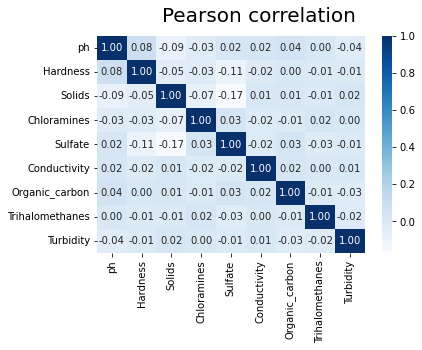

In [36]:
# plotting Pearson correlation coefficients between features

sns.heatmap(corr, cmap= 'Blues', annot= True, fmt= ".2f")

plt.suptitle('Pearson correlation', fontsize= 20)
plt.show()

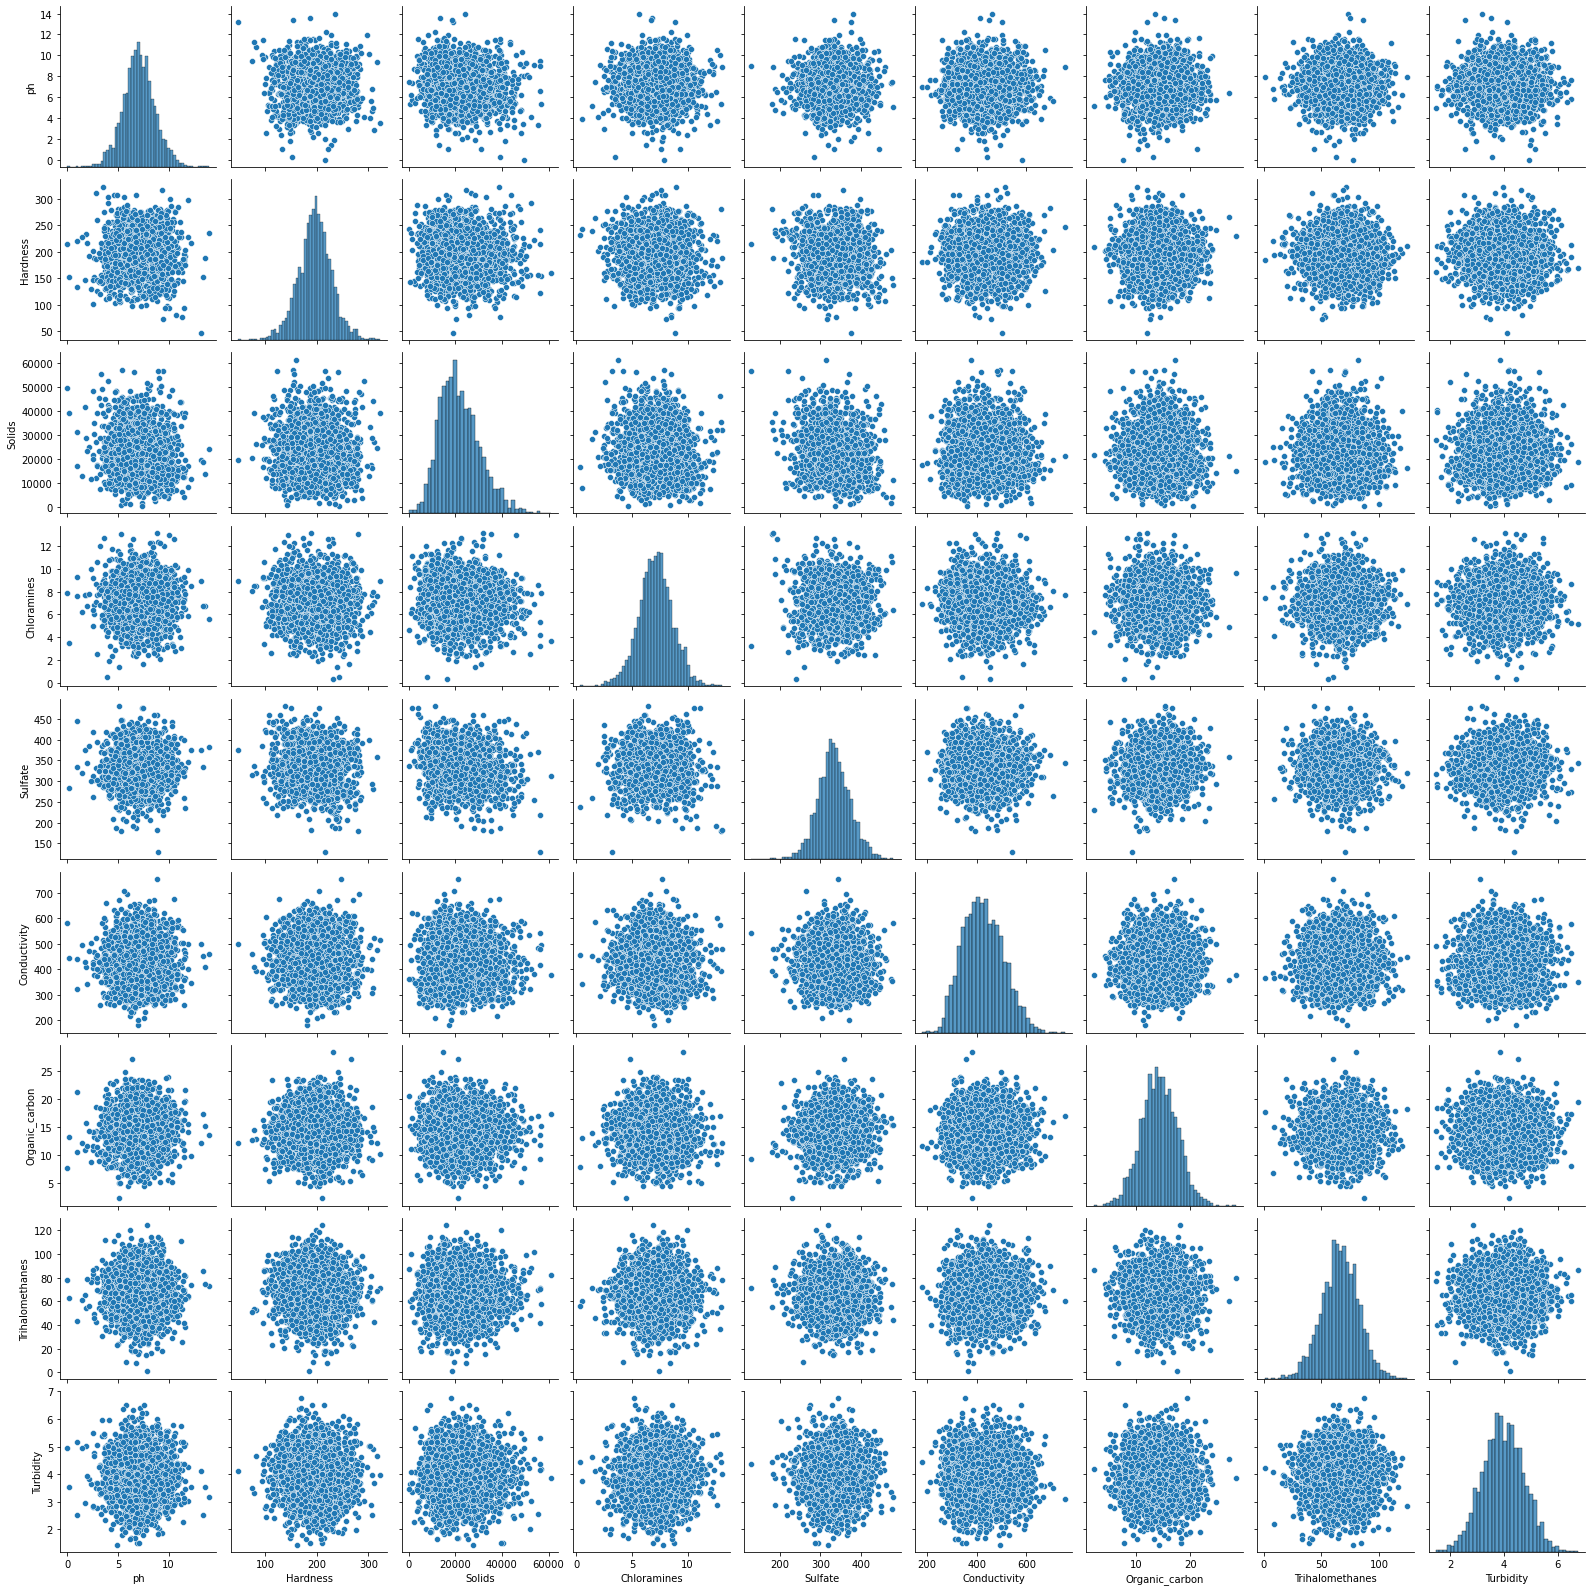

In [37]:
# plotting every feature distribution

sns.pairplot(df[numeric_columns])

## Preparación de datos

### Tratamiento de datos faltantes

In [38]:
# checking missing data in the entire dataset

df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [39]:
# checking ph missing values

ph_missing_values= df.ph.isnull().sum()
total_values= len(df)

ph_missing_values_perc= ( ph_missing_values/total_values) * 100

print(f'We are missing {ph_missing_values_perc:.2f}% of ph values.')

We are missing 14.99% of ph values.


In [40]:
# checking Sulfate missing values

Sulfate_missing_values= df.Sulfate.isnull().sum()

Sulfate_missing_values_perc= (Sulfate_missing_values/total_values) * 100

print(f'We are missing {Sulfate_missing_values_perc:.2f}% of Sulfate values.')

We are missing 23.84% of Sulfate values.


In [41]:
# checking Trihalomethanes missing values

Trihalomethanes_missing_values= df.Trihalomethanes.isnull().sum()

Trihalomethanes_missing_values_perc= (Trihalomethanes_missing_values/total_values) * 100

print(f'We are missing {Trihalomethanes_missing_values_perc:.2f}% of Trihalomethanes values.')

We are missing 4.95% of Trihalomethanes values.


In [42]:
# imputing with mean

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

df_Trihalomethanes= df.Trihalomethanes.to_frame()

df_Trihalomethanes_imputed= imputer.fit_transform(df_Trihalomethanes)

df_Trihalomethanes_imputed= pd.DataFrame(df_Trihalomethanes_imputed, columns= df_Trihalomethanes.columns)

df_inputs= df[numeric_columns].drop(['Trihalomethanes'], axis= 1)
df_inputs= pd.concat([df_inputs, df_Trihalomethanes_imputed], axis= 1)

In [43]:
# re-checking missing values

df_inputs.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Turbidity            0
Trihalomethanes      0
dtype: int64

In [44]:
# imputing with MICE

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer= IterativeImputer(max_iter=10000, n_nearest_features= df_inputs.shape[1])

imputed_data= mice_imputer.fit_transform(df_inputs[['ph','Sulfate']])

df_mice_imputed= pd.DataFrame(imputed_data, columns= ['ph','Sulfate'])

df_inputs= df_inputs.drop(['ph','Sulfate'], axis= 1)
df_inputs= pd.concat([df_inputs, df_mice_imputed], axis= 1)

In [45]:
# re-checking missing values

df_inputs.isna().sum()

Hardness           0
Solids             0
Chloramines        0
Conductivity       0
Organic_carbon     0
Turbidity          0
Trihalomethanes    0
ph                 0
Sulfate            0
dtype: int64

### Transformación de variables

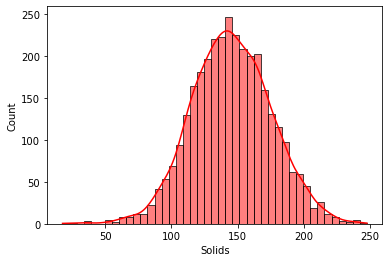

In [46]:
# cheking square root transformation for Solids feature

sns.histplot(x= df.Solids.apply(np.sqrt), kde= True, color='r') 
plt.show()

In [47]:
# checking transformation skewness

df.Solids.apply(np.sqrt).skew()

-0.015157793420941885

In [48]:
# applying and saving transformation 

df.Solids= df.Solids.apply(np.sqrt)

### Separación de train/test sets y normalización

In [49]:
# data splitting

from sklearn.model_selection import train_test_split

X = df_inputs
Y = df.Potability

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, train_size=0.7)

In [50]:
# using standardization for scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_train_scaled= pd.DataFrame(X_train_scaled, columns= X_train.columns)

X_test_scaled= scaler.transform(X_test)
X_test_scaled= pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Entrenamiento de modelos

### Logistic regression

### KNN

### Random Forest

### Support Vector Machines

### NNet